In [ ]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import sklearn

In [9]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 1.Univariate Analysis

In [ ]:
sns.displot(data['CreditScore'])

In [ ]:
sns.histplot(data['CreditScore'])

In [ ]:
sns.boxplot(x = data['CreditScore'])

# 2.Bivariate Analysis

In [ ]:
sns.lineplot(data = data, x = 'Tenure', y = 'CreditScore')

In [ ]:
sns.barplot(data = data, x = 'CreditScore', y ='EstimatedSalary')

In [ ]:
plot.figure(figsize = (20,10))
sns.barplot(data = data, x = 'CreditScore', y = 'Tenure')

In [ ]:
sns.scatterplot(data = data, x = 'CreditScore', y = 'Age')

# 3.Multivariate Analysis

In [ ]:
plot.figure(figsize = (10,5))

sns.scatterplot(data = data, x = 'CreditScore', y = 'Balance', hue = 'Gender')

NameError: ignored

<Figure size 720x360 with 0 Axes>

In [ ]:
sns.pairplot(data = data)

# Descriptive Statistics

In [ ]:
data.mean(numeric_only = True)

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [ ]:
data['CreditScore'].mode()

0    850
Name: CreditScore, dtype: int64

In [ ]:
data.median(numeric_only = True)

RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [ ]:
data['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [ ]:
data.std(numeric_only = True)

RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

# outliers

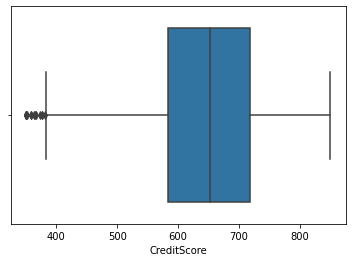

In [ ]:
sns.boxplot(x = data['CreditScore'])

In [ ]:
q = data.quantile([0.75, 0.25])

In [ ]:
q

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0


In [ ]:
iqr =  q.iloc[0] - q.iloc[1] 

In [ ]:
iqr

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [ ]:
u = q.iloc[0] + (1.5*iqr)

In [ ]:
u

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [ ]:
l = q.iloc[1] - (1.5*iqr)

In [ ]:
l

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [ ]:
data['CreditScore'] = py.where(py.logical_or(data['CreditScore'] > 900, data['CreditScore'] < 383), 652, data['CreditScore'])

<AxesSubplot:xlabel='CreditScore'>

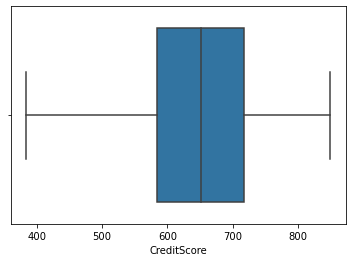

In [ ]:
sns.boxplot(x = data['CreditScore'])

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Surname'] = le.fit_transform(data['Surname'])

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Split the data into x and y

In [ ]:
x = data.iloc[:, 0:13]
x


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y = data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

# split x xnd y into train test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train

array([[ 0.92889885, -0.79703192, -1.47580983, ...,  0.64609167,
         0.97024255, -0.77021814],
       [ 1.39655257,  0.71431365, -1.58808148, ...,  0.64609167,
        -1.03067011, -1.39576675],
       [-0.4532777 ,  0.96344969, -0.24082173, ..., -1.54776799,
         0.97024255, -1.49965629],
       ...,
       [-0.60119484, -1.62052514, -0.36136603, ...,  0.64609167,
        -1.03067011,  1.41441489],
       [ 1.67853045, -0.37403866,  0.72589622, ...,  0.64609167,
         0.97024255,  0.84614739],
       [-0.78548505, -1.36411841,  1.3829808 , ...,  0.64609167,
        -1.03067011,  0.32630495]])

In [ ]:
x_test.shape

(3000, 13)

In [ ]:
y_train

7681    1
9031    0
3691    0
202     1
5625    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7000, dtype: int64

In [ ]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
4004    0
7375    0
9307    0
8394    0
5233    1
Name: Exited, Length: 3000, dtype: int64